In [1]:
%run nbinit.ipy

... Configuring matplotlib formats
... Configuring matplotlib with inline figures
... Importing numpy as np, scipy as sp, pyplot as plt, scipy.stats as stats
   ... scipy.signal as sig
... Importing widgets, display, HTML, Image, Javascript
... Some LaTeX definitions


... Defining figures captions 


... Loading customized Javascript for interactive solutions (show/hide)
... Redefining interactive from ipywidgets
... Redefining capture for ipywidgets < 7


# Introduction to the Fourier representation

We begin by a simple example which shows that the addition of some sine waves, with special coefficients, converges constructively. We then explain that any periodic signal can be expressed as a sum of sine waves. This is the notion of Fourier series. After an illustration (denoising of a corrupted signal) which introduces a notion of filtering in the frequency domain, we show how the Fourier representation can be extended to aperiodic signals. 

- [Simple examples](#simple_examples)
- [Decomposition on basis - scalar producs](#decomposition)
- [Decomposition of periodic functions -- Fourier series](#Fourier_series)
- [Complex Fourier series](#Complex_Fourier_series)
- [Computer experiment](#Compute_exp)
- [Towards Fourier transform](#Towards_the_FT)

## Simple examples <a name="simple_examples"></a>

> Read the script below, execute (CTRL-Enter), experiment with the parameters. 

Text(0.5,1,'Somme avec 150.0 termes')

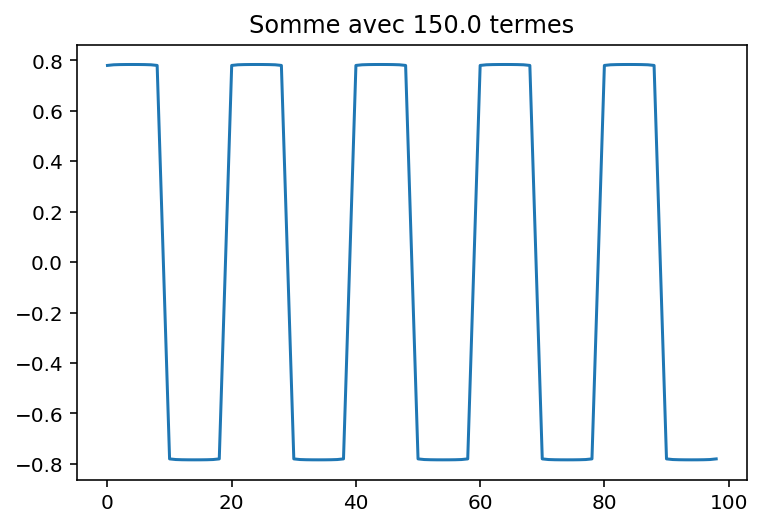

In [2]:
N=100
L=20
s=np.zeros(N-1)

for k in np.arange(1,300,2):
    s=s+1/float(k)*sin(2*pi*k/L*np.arange(1,N,1))
plt.plot(s)    
plt.title("Somme avec "+str((k-1)/2+1)+" termes")

The next example is more involved in that it sums sin a cos of different frequencies and with different amplitudes. We also add widgets (sliders) which enable to interact more easily with the program. 

In [31]:
@out.capture(clear_output=True, wait=True)
def sfou_exp(Km):
    #clear_output(wait=True)
    Kmax=int(Km)
    L=400
    N=1000
    k=0
    s=np.zeros(N-1)
    #plt.clf()
    for k in np.arange(1,Kmax):
        ak=0
        bk=1.0/k if (k % 2) == 1 else 0 # k odd
        
       # ak=0 #if (k % 2) == 1 else -2.0/(pi*k**2) 
       # bk=-1.0/k if (k % 2) == 1 else 1.0/k # 
        
        s=s+ak*cos(2*pi*k/L*np.arange(1,N,1))+bk*sin(2*pi*k/L*np.arange(1,N,1))
    ax = plt.axes(xlim=(0, N), ylim=(-2, 2))        
    ax.plot(s)    
    plt.title("Sum with {} terms".format(k+1))
    plt.show()
    
### --------------------------------------------------    

In [37]:
out = widgets.Output()

fig = plt.figure()
ax = plt.axes(xlim=(0, 100), ylim=(-2, 2))

# ---- Widgets -----------------------
# slider=widgets.FloatSlider(max=100,min=0,step=1,value=1)
slide=widgets.IntSlider(max=100,min=0,step=1,value=5)
val=widgets.IntText(value='1')

#----- Callbacks des widgets -------------
@out.capture(clear_output=True, wait=True)
def sfou_exp(Km):
    #clear_output(wait=True)
    Kmax=int(Km)
    L=400
    N=1000
    k=0
    s=np.zeros(N-1)
    #plt.clf()
    for k in np.arange(1,Kmax):
        ak=0
        bk=1.0/k if (k % 2) == 1 else 0 # k odd
        
       # ak=0 #if (k % 2) == 1 else -2.0/(pi*k**2) 
       # bk=-1.0/k if (k % 2) == 1 else 1.0/k # 
        
        s=s+ak*cos(2*pi*k/L*np.arange(1,N,1))+bk*sin(2*pi*k/L*np.arange(1,N,1))
    ax = plt.axes(xlim=(0, N), ylim=(-2, 2))        
    ax.plot(s)    
    plt.title("Sum with {} terms".format(k+1))
    plt.show()
    
### --------------------------------------------------    

#@out.capture(clear_output=True, wait=True)
def sfou1_Km(param):
        Km = param['new']
        val.value=str(Km)
        sfou_exp(Km)

#@out.capture(clear_output=True, wait=True)
def sfou2_Km(param):
        Km = param.new
        slide.value=Km
        #sfou_exp(Km.value)

    
# ---- Display -----------------    
#display(slide)
#display(val)
slide.observe(sfou1_Km, names=['value'])
sfou_exp(5)
#val.observe(sfou2_Km,names='value')
display(widgets.VBox([slide, out]))

### Decomposition on basis - scalar producs <a name="decomposition"></a>

We recall here that any vector can be expressed on a orthonormal basis, and that the coordinates are the scalar product of the vector with the basis vectors. 

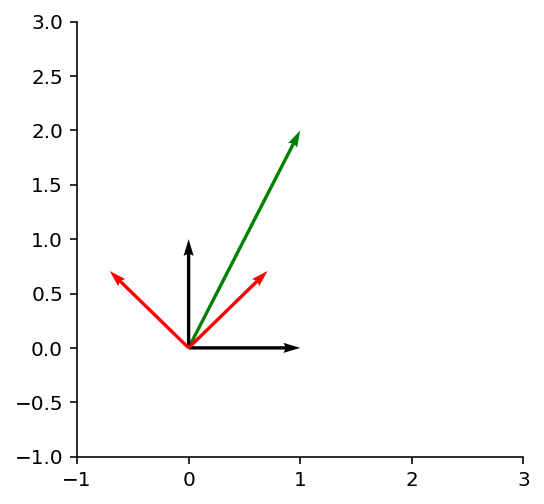

In [5]:
z=array([1,2])
u=array([0,1])
v=array([1,0])
u1=array([1,1])/sqrt(2)
v1=array([-1,1])/sqrt(2)

f,ax=subplots(1,1,figsize=(4,4))
ax.set_xlim([-1,3])
ax.set_ylim([-1,3])
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
#ax.spines['bottom'].set_position('center')
ax.quiver(0,0,z[0],z[1],angles='xy',scale_units='xy',scale=1,color='green')
ax.quiver(0,0,u[0],u[1],angles='xy',scale_units='xy',scale=1,color='black')
ax.quiver(0,0,v[0],v[1],angles='xy',scale_units='xy',scale=1,color='black')
ax.quiver(0,0,u1[0],u1[1],angles='xy',scale_units='xy',scale=1,color='red')
ax.quiver(0,0,v1[0],v1[1],angles='xy',scale_units='xy',scale=1,color='red')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

From a coordinate system to another: 
Take a vector (in green in the illustration). Its coordinates in the system $(u,v)$ are [1,2]. In order to obtain the coordinates in the new system $(O,u_1,v_1)$, we have to project the vector on $u_1$ and $u_2$. This is done by the scalar products: 

In [6]:
x=z.dot(u1)
y=z.dot(v1)
print('New coordinates: ',x,y)

New coordinates:  2.1213203435596424 0.7071067811865475


## Decomposition of periodic functions -- Fourier series <a name="Fourier_series"></a>

This idea can be extended to (periodic) functions. Consider the set of all even periodic functions, with a given period, say $L$. The cosine wave functions of all the multiple or the *fundamental* frequency $1/L$ constitute a basis of even periodic functions with period $T$. Let us check that these functions are normed and ortogonal with each other.

In [7]:
L=200
k=8
l=3
sk=sqrt(2/L)*cos(2*pi/L*k*np.arange(0,L))
sl=sqrt(2/L)*cos(2*pi/L*l*np.arange(0,L))


In [8]:
sl.dot(sl)

1.0000000000000004

Except in the case $l=0$ where a factor 2 entails

In [9]:
l=0
sl=sqrt(2/L)*cos(2*pi/L*l*np.arange(0,L))
sl.dot(sl)

1.9999999999999998

Therefore, the decomposition of any even periodic function $x(n)$ with period $L$ on the basis of cosines expresses as
$$
x(n)  = \sqrt{\frac{2}{L}}\left(\frac{a_0}{2}+\sum_{k=1}^{L-1} a_k \cos(2\pi k/L n)\right)
$$
with
$$a_k = \sqrt{\frac{2}{L}}\sum_{n\in[L]} x(n)  \cos(2 \pi k/L n). $$
Regrouping the factors, the series can also be expressed as
$$
x_\mathrm{even}(n)  = \left(\frac{a_0}{2}+\sum_{k=1}^{L-1} a_k \cos(2\pi k/L n)\right)
$$
with
$$
a_k = \frac{2}{L}\sum_{n\in[L]} x(n)  \cos(2 \pi k/L n), 
$$ 
where the notation $n\in[L]$  indicates that the sum has to be done on any length-$L$ interval. 
The very same reasoning can be done for odd functions, which introduces a decomposition into sine waves:
$$
x_\mathrm{odd}(n)  = \sum_{k=0}^{L-1} b_k \sin(2\pi k/L n)
$$
with
$$
b_k = \frac{2}{L}\sum_{n\in[L]} x(n)  \sin(2 \pi k/L n), 
$$ 
Since any function can be decomposed into an odd + even part
$$
x(n) = x_\mathrm{even}(n) + x_\mathrm{odd}(n) = \frac{x(n)+x(-n)}{2} + \frac{x(n)-x(-n)}{2},
$$
we have the sum of the decompositions:

$$
\boxed{
x(n)  = \frac{a_0}{2}+\sum_{k=1}^{L-1} a_k \cos(2\pi k/L n)+\sum_{k=1}^{+\infty} b_k \sin(2\pi k/L n)
}
$$
with
$$
\boxed{
\begin{cases}
a_k = \frac{2}{L}\sum_{n\in[L]} x(n)  \cos(2 \pi k/L n),\\
b_k = \frac{2}{L}\sum_{n\in[L]} x(n)  \sin(2 \pi k/L n), 
\end{cases}
}
$$
This is the definition of the Fourier series, and this is no more compicated than that... A remaining question is the question of convergence. That is, does the series converge to the true function? The short answer is Yes: the equality in the series expansion is a true equality, not an approximation. This is a bit out of scope for this course, but you may have a look at [this article](http://en.wikipedia.org/wiki/Convergence_of_Fourier_series). 

There of course exists a continuous version, valid for time-continuous dignals. 



## Complex Fourier series

### Introduction

Another series expansion can be defined for complex valued signals. In such case, the trigonometric functions will be replaced by complex exponentials $\exp(j2\pi k/L n)$. Let us check that they indeed form a basis of signals:

In [10]:
L=200
k=8
l=3
sk=sqrt(1/L)*exp(1j*2*pi/L*k*np.arange(0,L))
sl=sqrt(1/L)*exp(1j*2*pi/L*l*np.arange(0,L))
print("scalar product between sk and sl: ",np.vdot(sk,sl))
print("scalar product between sk and sk (i.e. norm of sk): ",np.vdot(sk,sk))

scalar product between sk and sl:  (-1.9932252838852267e-17+5.886840063482993e-17j)
scalar product between sk and sk (i.e. norm of sk):  (1+0j)


It is thus possible to decompose a signal as follows:
$$\boxed{\begin{aligned}
x(n) &= \sum_{k=0}^{L-1} c_k  e^{j2\pi\frac{ k n}{L}}\\
\text{with   }
c_k &= \frac{1}{L} \sum_{n\in[L]} x(n) e^{-j2\pi\frac{ kn }{L} }
\end{aligned}
}$$
where $c_k$ is the dot product between $x(n)$ and $\exp(j2\pi k/L n)$, i.e. the 'coordinate' of $x$ with respect to the 'vector' $\exp(j2\pi k/L n)$. 
This is nothing but the definition of the `complex Fourier series`. 

**Exercise** -- Show that $c_k$ is periodic with period $L$; i.e. $c_k=c_{k+L}$. 

Since $c_k$ is periodic in $k$ of period $L$, we see that in term or the *"normalized frequency"* $k/L$, it is periodic with period 1. 

#### Relation of the complex Fourier Series with the standard Fourier Series

$\def\R#1{\mathcal{R}\left\{#1\right\}}$
$\def\I#1{\mathcal{I}\left\{#1\right\}}$

It is easy to find a relation between this complex Fourier series and the classical Fourier series. The series can be rewritten as
$$
x(n) = c_0 + \sum_{k=1}^{+\infty} c_k e^{j2\pi k/L n} + c_{-k} e^{-j2\pi k/L n}.
$$

By using the [Euler formulas](http://en.wikipedia.org/wiki/Euler's_formula), developping and rearranging, we get
\begin{align}
x(n) & = c_0 + \sum_{k=1}^{+\infty} \R{c_k+c_{-k}}\cos(2\pi k/L n) + 
 \I{c_{-k}-c_k}\sin(2\pi k/L n) \\ &+ j\left(\R{c_k-c_{-k}}\sin(2\pi k/L n) + \I{c_k+c_{-k}} \cos(2\pi k/L n)\right).   
\end{align}
Suppose that $x(n)$ is real valued. Then by direct identification, we have
$$
\begin{cases}
a_k=\R{c_k+c_{-k}}\\
b_k=\I{c_{-k}-c_k}
\end{cases}
$$
and, by the cancellation of the imaginary part, the following symmetry relationships for real signals: 
$$
\begin{cases}
\R{c_k}=\R{c_{-k}}\\
\I{c_k}=-\I{c_{-k}}.
\end{cases}
$$
This symmetry is called `Hermitian symmetry'. 

### Computer experiment <a name="Compute_exp"> </a>

> Experiment. Given a signal, computes its decomposition and then reconstruct the signal from its individual components.

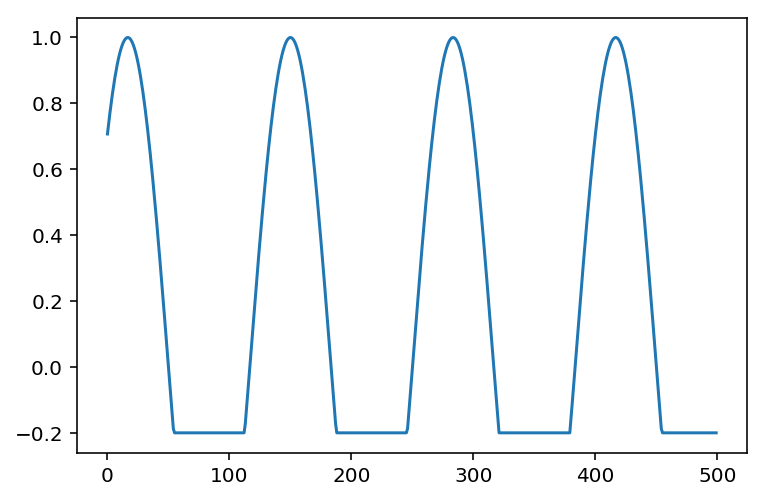

In [11]:
%matplotlib inline
L=400
N=500
t=np.arange(N)
s=sin(2*pi*3*t/L+pi/4)
x=[ss if ss>-0.2 else -0.2 for ss in s]
plt.plot(t,x)

A function for computing the Fourier series coefficients

In [12]:
# compute the coeffs ck
def coeffck(x,L,k):
    assert np.size(x)==L, "input must be of length L"     
    karray=[]
    res=[]
    if isinstance(k,int):
        karray.append(k)
    else:
        karray=np.array(k)
   
    for k in karray:
        res.append(np.vdot(exp(1j*2*pi/L*k*np.arange(0,L)),x))
    return 1/L*np.array(res)

#test: coeffck(x[0:L],L,[-12,1,7])
# --> array([  1.51702135e-02 +4.60742555e-17j,
#     -1.31708229e-05 -1.31708229e-05j,   1.37224241e-05 -1.37224241e-05j])

Now let us compute the coeffs for actual signal

Text(0.5,0,'Time')

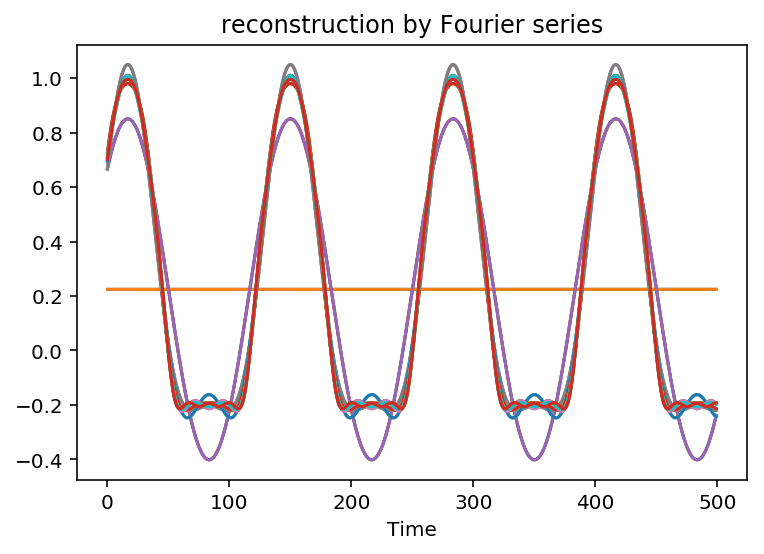

In [14]:
# compute the coeffs for actual signal
c1=coeffck(x[0:L],L,np.arange(0,100))
c2=coeffck(x[0:L],L,np.arange(0,-100,-1))
s=c1[0]*np.ones((N))
for k in np.arange(1,25):
    s=s+c1[k]*exp(1j*2*pi/L*k*np.arange(0,N))+c2[k]*exp(-1j*2*pi/L*k*np.arange(0,N))
    plt.plot(t,np.real(s))
plt.title("reconstruction by Fourier series")
plt.xlabel("Time")

In the frequency representation, the x axis corresponds to the frequencies k/L 
of the complex exponentials.  
Therefore, if a signal is periodic of period M, the corresponding fundamental frequency
is 1/M. This frequency then appears at index ko=L/M (if this ratio is an integer). 
Harmonics will appear at multiples of ko.


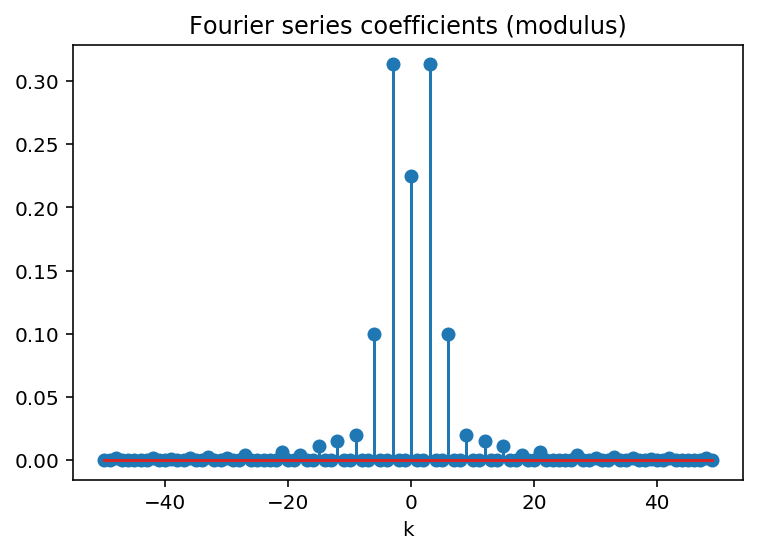

In [15]:
plt.figure()
kk=np.arange(-50,50)
c=coeffck(x[0:L],L,kk)
plt.stem(kk,np.abs(c))
plt.title("Fourier series coefficients (modulus)")
plt.xlabel("k")
msg="""In the frequency representation, the x axis corresponds to the frequencies k/L 
of the complex exponentials.  
Therefore, if a signal is periodic of period M, the corresponding fundamental frequency
is 1/M. This frequency then appears at index ko=L/M (if this ratio is an integer). 
Harmonics will appear at multiples of ko."""
print(msg)

A pulse train corrupts our original signal

In [16]:
L=400
# define a pulse train which will corrupt our original signal
def sign(x):
    if isinstance(x,(int,float)):
        return 1 if x>=0 else -1
    else:
        return np.array([1 if u>=0 else -1 for u in x])

#test: sign([2, 1, -0.2, 0])


def repeat(x,n):
    if isinstance(x,(np.ndarray,list,int,float)):
        return np.array([list(x)*n]).flatten()
    else:
        raise('input must be an array,list,or float/int')

#t=np.arange(N)
#sig=sign(sin(2*pi*10*t/L))

(1.1, -1.1)

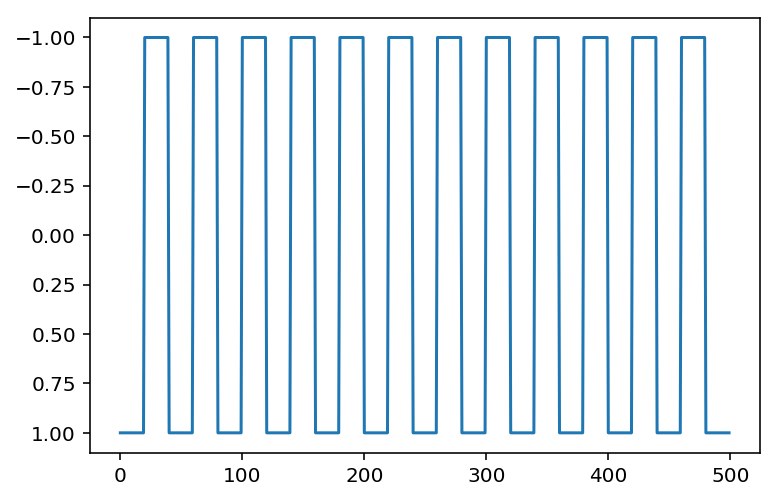

In [17]:
rect=np.concatenate((np.ones(20),-np.ones(20)))
#[1,1,1,1,1,-1,-1,-1,-1,-1]

sig=repeat(rect,15)
sig=sig[0:N]
plt.plot(sig)
plt.ylim({-1.1, 1.1})


Compute and represent the Fourier coeffs of the pulse train

Text(0.5,0,'k')

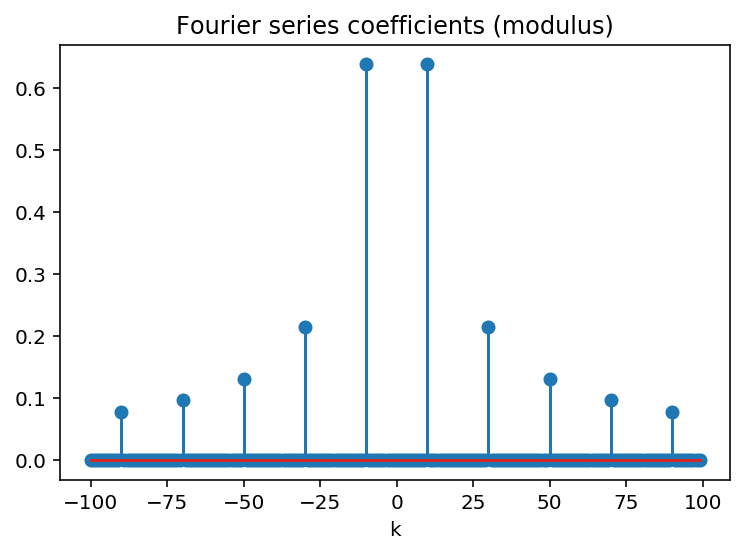

In [18]:
kk=np.arange(-100,100)
c=coeffck(sig[0:L],L,kk)
plt.figure()
plt.stem(kk,np.abs(c))
plt.title("Fourier series coefficients (modulus)")
plt.xlabel("k")


The fundamental frequency of the pulse train is 1 over the length of the pulse, that is 1/40 here. Since The Fourier series is computed on a length L=400, the harmonics appear every 10 samples (ie at indexes k multiples of 10). 

Text(0.5,0,'k')

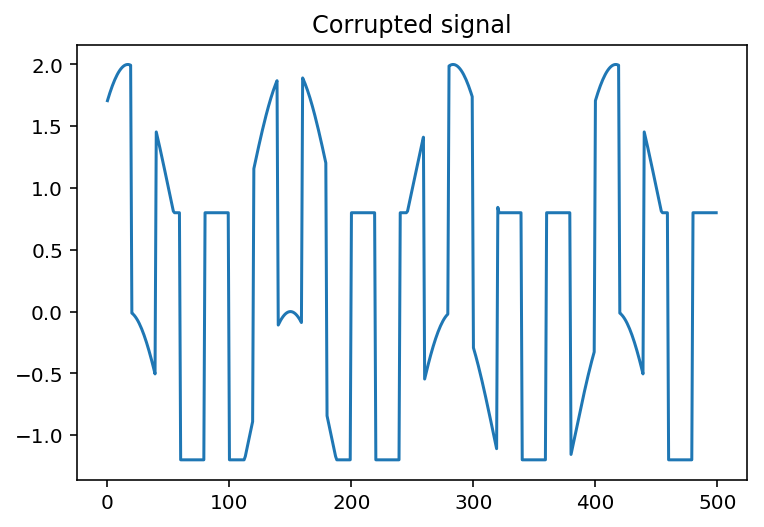

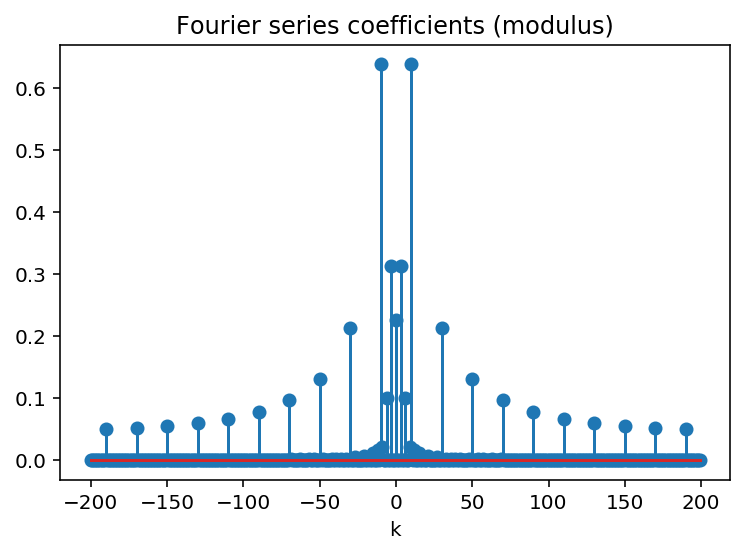

In [19]:
z=x+1*sig
plt.plot(z)
plt.title("Corrupted signal")

kk=np.arange(-200,200)
cz=coeffck(z[0:L],L,kk)
plt.figure()
plt.stem(kk,np.abs(cz))
plt.title("Fourier series coefficients (modulus)")
plt.xlabel("k")

Now, we try to kill all the frequencies harmonics of 10 (the fundamental frequency of the pulse train), and reconstruct the resulting signal...

Text(0.5,0,'Time')

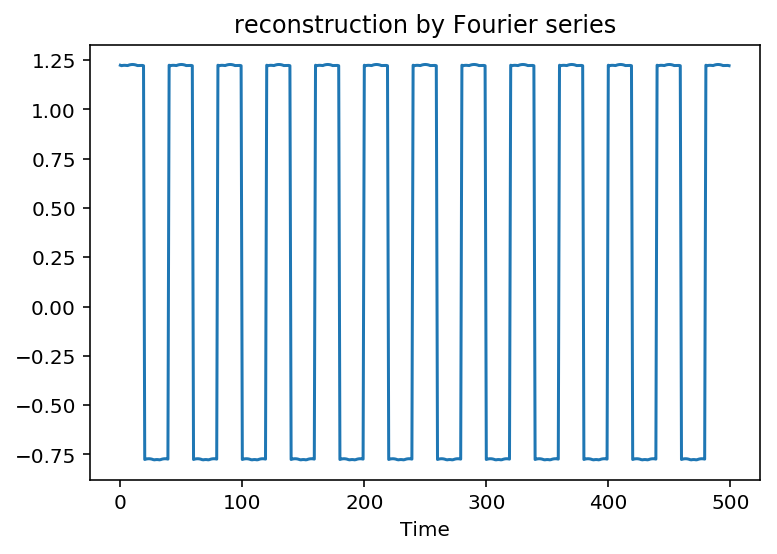

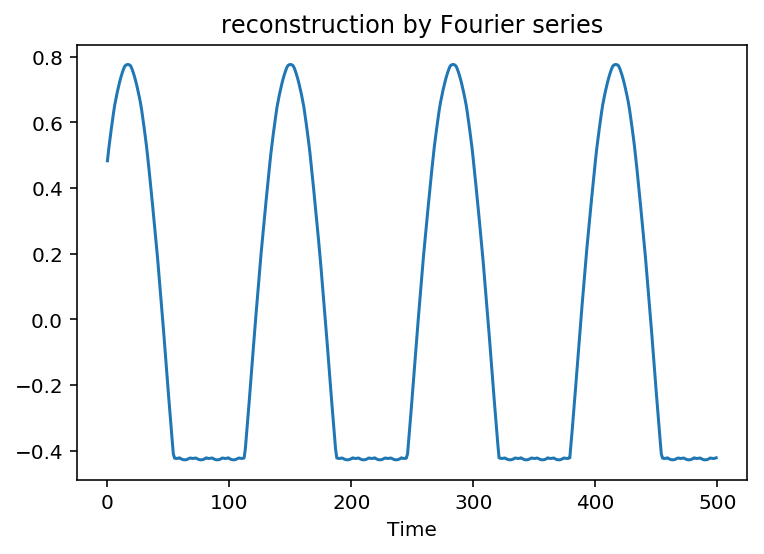

In [20]:
# kill frequencies harmonics of 10 (the fundamental frequency of the pulse train)
# and reconstruct the resulting signal

s=np.zeros(N)
kmin=np.min(kk)
for k in kk:
    if not k%10:  #true if k is multiple of 10
        s=s+cz[k+kmin]*exp(1j*2*pi/L*k*np.arange(0,N))
plt.figure()
plt.plot(t,np.real(s))
plt.title("reconstruction by Fourier series")
plt.xlabel("Time")

plt.figure()
plt.plot(t,z-np.real(s))
plt.title("reconstruction by Fourier series")
plt.xlabel("Time")

----
<div align=right> [Index](toc.ipynb) - [Back](Intro_Filtering.ipynb) - [Next](Fourier_transform.ipynb)</div>